# I. Exploratory Data Analysis and Quality Report

In [265]:
# importing libraries
import os
import numpy as np
from scipy import stats
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn import metrics
from sklearn.metrics import silhouette_score
from os import system
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\shubh\\Downloads\\AIML\\AIML_GreatLearning'

In [266]:
# Importing data
data=pd.read_csv('../Data/credit_card_customer_data.csv')
columns = data.columns
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## 1. Univariate analysis

In [267]:
s1 = data.shape
print(data.shape) # Number of rows and columns in the dataframe
print('\033[1m'+ 'Null values: ' , data.isnull().values.any()) # To check for null values in the dataframe and print in bold
print('\033[0m') # To remove bold formatting
print(data.info()) # To check the data type of the columns of the dataframe
print(data.describe().T) # To review the statistical summary of the dataframe
print(data.drop_duplicates(inplace=True)) # To drop duplicate rows in the dataframe
s2 = data.shape
print(data.shape) # To print shape after dropping duplicates
if s1[0]-s2[0]>1:
    print('\033[1m'+'Duplicates have been dropped\n')
else:
    print('\033[1m'+'No duplicates found\n')


(660, 7)
Null values:  False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None
                     count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total

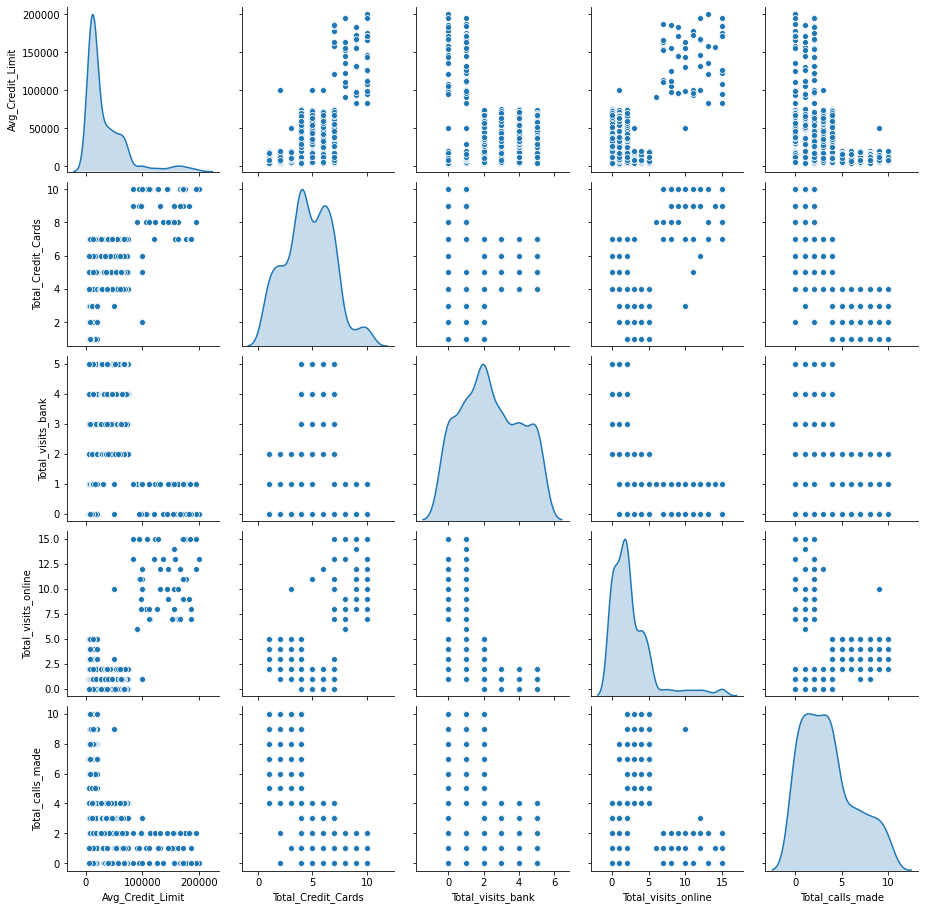

In [268]:
# Data description
'''The columns of customer key and serial number are not required to perform univariate and bivariate analysis since they'''
'''offer no further insight into the data'''
data_sc = data.iloc[:, 2:].apply(zscore) # Scaling data based on z-score
sns.pairplot(data.iloc[:, 2:], diag_kind='kde')

## 2. Bivariate analysis

Bivariate analysis

                     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit             1.000000            0.608860          -0.100312   
Total_Credit_Cards           0.608860            1.000000           0.315796   
Total_visits_bank           -0.100312            0.315796           1.000000   
Total_visits_online          0.551385            0.167758          -0.551861   
Total_calls_made            -0.414352           -0.651251          -0.506016   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                0.551385         -0.414352  
Total_Credit_Cards              0.167758         -0.651251  
Total_visits_bank              -0.551861         -0.506016  
Total_visits_online             1.000000          0.127299  
Total_calls_made                0.127299          1.000000  


<AxesSubplot:>

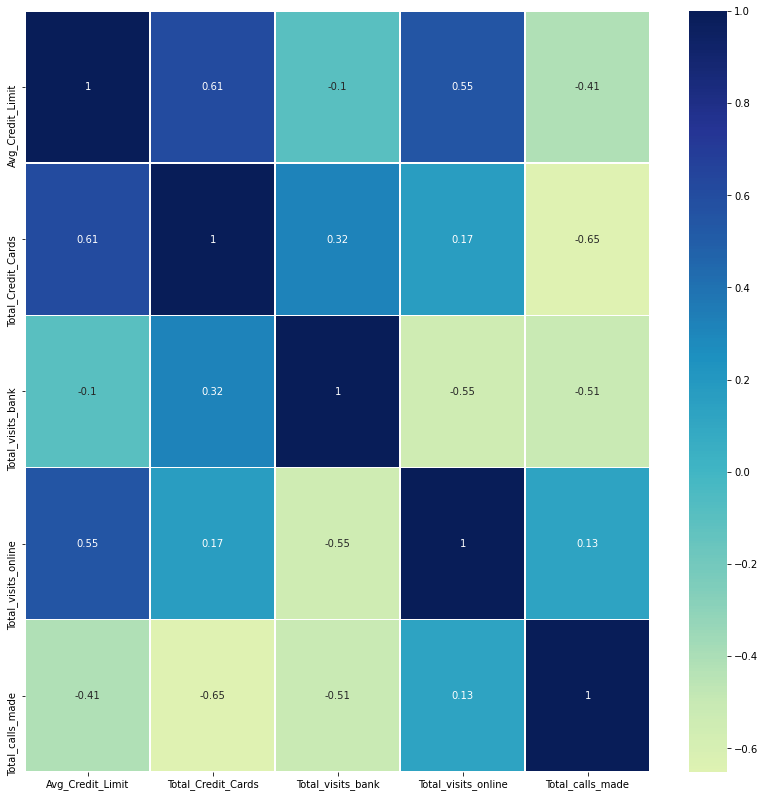

In [269]:
print('Bivariate analysis\n')
corr = data.iloc[:,2:].corr() # Correlation matrix
print(corr)
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr, annot=True, linewidths=.5, center=0, cbar=True, cmap="YlGnBu")

<AxesSubplot:>

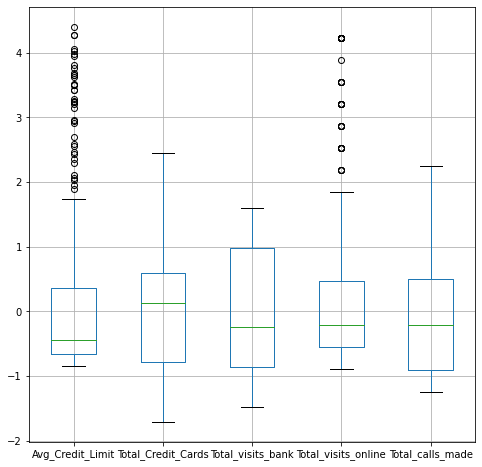

In [270]:
# Generating boxplots for all columns
data_sc.iloc[:, 0:].boxplot(figsize=(8, 8))

In [271]:
data_unsc = data.iloc[:, 2:][(np.abs(stats.zscore(data.iloc[:,2:])) < 3.5).all(axis=1)]
data_unsc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<AxesSubplot:>

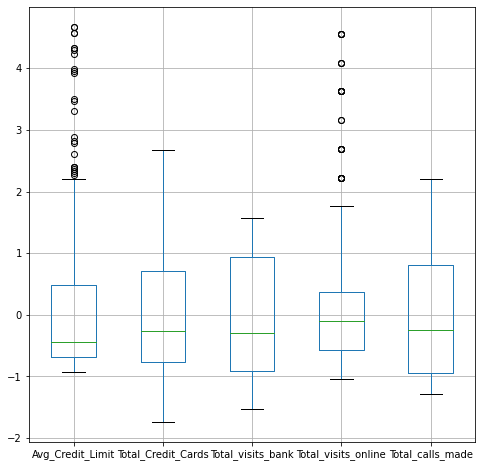

In [272]:
data_sc = data_unsc.apply(zscore)
data_sc.boxplot(figsize=(8,8))

### Conclusions for EDA

- **Univariate analysis:**
- 1. Avg_credit_limit distribution shows three distinct peaks, which indicates the subdivision of the bank customers into three different categories according to their credit limit, namely: Low credit limit, Medium credit limit and High credit limit customers. A similar distribution can be seen for Total_credit_cards and Total_visits_online.
- 2. Total_calls_made distribution shows a division into two categories: frequently and infrequently contacted customers. Infrequently contacted customers are those who have a high credit limit, high number of credit cards and high frequency of bank visits. Frequently contacted customers are the rest.
- 3. The data columns of avg_credit_limit, total_visits_online and total_calls_made are right skewed, while the rest are close to normal distributions.

- **Bivariate analysis:** 
- 1. Avg_credit_limit is strongly correlated with Total_Credit_Cards and Total_visits online. This makes sense as with increase in credit cards the average limit will increase. This will also increase (not in all cases), the tendency to visit online for transactions. Avg_credit_limit is slightly negatively correlated with Total_visits_bank which means people with a large credit limit prefer holding their transactions online.
- 2. Total_calls_made is negatively correlated to Avg_Credit_Limit and Total_Credit_Cards which means that if the customer has a high credit limit and large number of credit cards, they are not being targeted for upselling. Total_calls_made is negatively correlated with Total_visits_bank which means that people who visit the bank often are not necessarily targeted with upselling.

- A log transform to get rid of outliers is not performed as it produces NaN values in the columns with the most outliers. The number of NaN values are too high as compared to the total number of values in the dataframe to drop them. Hence the outliers are removed using quartile criterion with the help of zscores.



## 3. K-means Clustering

Text(0, 0.5, 'Average distortion')

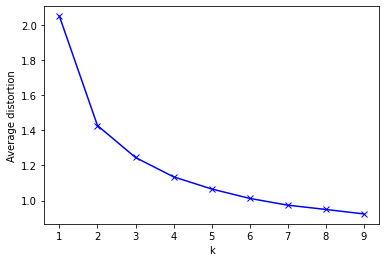

In [273]:
ncluster=range(1,10)
meanDist=[]

for k in ncluster:
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(data_sc)
    prediction=kmodel.predict(data_sc)
    meanDist.append(sum(np.min(cdist(data_sc, kmodel.cluster_centers_, 'euclidean'), axis=1))/data_sc.shape[0])
    
plt.plot(ncluster, meanDist, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')

#### Conclusion: The elbow occurs at k=3 clusters

In [354]:
data2 = data_sc
n=[2, 3, 4, 5, 6, 7]
kmeans_sil_score=[]

# function for finding silhoutte score for kmeans clustering
def Kmeans_fn(n):
    kmodel2 = KMeans(n)
    kmodel2.fit(data2)
    labels = kmodel2.labels_
    prediction = kmodel2.predict(data2)
    ksilscore = silhouette_score(data2, prediction)
    ret = [ksilscore, prediction, kmodel2, labels]
    return ret

for i in n:
    kmeans_sil_score.append(Kmeans_fn(i)[0])

label = Kmeans_fn(n[np.argmax(kmeans_sil_score)])[3]
print('Maximum value of silhoutte score corresponds to number of clusters = ', n[np.argmax(kmeans_sil_score)])
kmeans_ss = np.max(kmeans_sil_score)
print('Maximum silhouette score for kmeans clustering: ', kmeans_ss )
counts = np.bincount(label[label>=0])
print('Number of counts of each bin are: ', counts)
data2['Group'] = Kmeans_fn(n[np.argmax(kmeans_sil_score)])[1] # adding group column to scaled data as data2
data2.head()

Maximum value of silhoutte score corresponds to number of clusters =  3
Maximum silhouette score for kmeans clustering:  0.5256784311568276
Number of counts of each bin are:  [222 388  26]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,2.405491,-1.251277,-0.913280,-0.568345,-1.286461,0
1,0.687013,-0.760943,-1.532518,3.623929,1.856392,1
2,0.687013,1.200393,-0.913280,0.363272,0.110362,0
3,-0.000378,0.219725,-0.913280,-0.568345,0.110362,0
4,2.405491,0.710059,-1.532518,4.555546,-0.238844,2


       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Group                                                            
0             -0.613276           -1.058250          -0.958111   
1              0.124024            0.465522           0.618102   
2              3.357264            2.030190          -1.103815   

       Total_visits_online  Total_calls_made  
Group                                         
0                 0.630953          1.131118  
1                -0.573134         -0.585356  
2                 3.211868         -0.856669  


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[Group]'>,
        <AxesSubplot:>]], dtype=object)

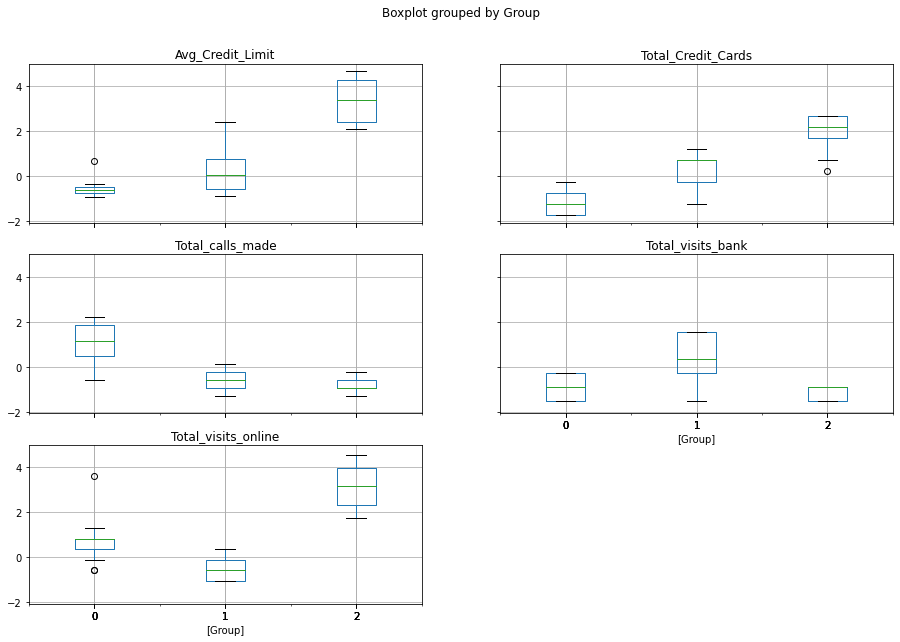

In [299]:
# Groupby operation on column 'group'
data_group = data2.groupby(['Group'])
print(data_group.mean())
data2.boxplot(by='Group',figsize=(15,10))

#### The boxplots are analyzed and compared with respect to their mean values.

- **Group 0** is characterized by least avg_credit limit, least number of credit cards, less visits to the bank and less online visits. Calls made to this group are the highest. The number of customers in this group are in between: **222**.
- **Group 1** is characterized by a medium avg_credit_limit, average number of credit cards, highest visits to the bank, lowest online visits and average number of calls made. The number of customers in this group are highets: **388**.
- **Group 2** is characterized by the highest avg_credit_limit, highest number of credit cards, highest number of visits online, low visits to the bank and low number of calls made. The number of customers in this group are the least: **26**.

In [302]:
# Cluster center data
centroid = kmodel2.cluster_centers_
centroid_df = pd.DataFrame(centroid, columns = list(data_sc) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,2.831764,1.862226,-1.105763,2.827319,-0.874330,2.000000
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,0.004464
2,-0.021062,0.373690,0.666395,-0.553672,-0.553005,1.984456


### Observations for K-means Clustering:
1. Group 2 has highest values for Avg_Credit_Limit, Total_Credit_Cards and Total_visits_online. These correspond with the pairplots in the bivariate analysis wherein Avg_Credit_Limit is strongly correlated to Total_Credit_cards and Total_visits_online (0.61 and 0.55) respectively. 
2. Group 1 has highest value for Total_visits_bank
3. Group 0 has highest value for Total_calls_made

## 4. Heirarchical Clustering

Cophenetic coefficients are:  [0.9039832917592096, 0.8668961777889805, 0.7311147805308591]


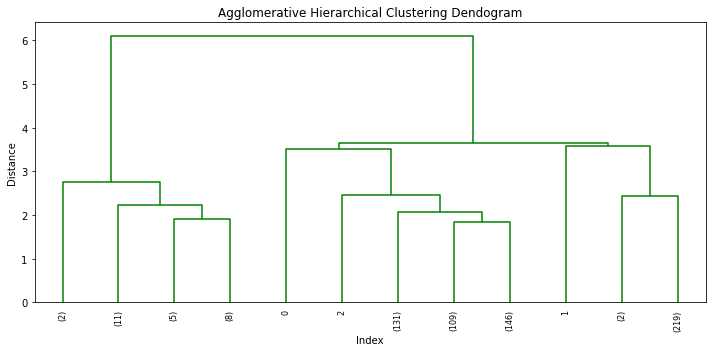

In [363]:
# Generating linkages for different methods
methods = ['average', 'complete', 'ward']
c = [] # array to append cophenetic coefficients to find which method shall be used
coph_dists = []
for m in methods:
    Z = linkage(data_sc.iloc[:, 0:], metric='euclidean', method=m)
    c.append(cophenet(Z, pdist(data_sc.iloc[:,0:]))[0]) 
    coph_dists.append(cophenet(Z, pdist(data_sc.iloc[:,0:]))[1])
print('Cophenetic coefficients are: ',c)
maxarg = np.argmax(c)
Z = linkage(data_sc.iloc[:, 0:], metric='euclidean', method=methods[maxarg])
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode = 'lastp', p = 12, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [364]:
from scipy.cluster.hierarchy import fcluster
#dendrogram(Z)
max_d = np.linspace(1, 5, 25)
sih_score=0
max_ss=0
maxd = 0
for i in max_d:
    clusters = fcluster(Z, i, criterion='distance')
    sih_score = silhouette_score(data_sc.iloc[:, 0:],clusters)
    if sih_score>max_ss:
        max_ss = sih_score
        maxd = i
print('The silhouette score is:', max_ss)

The silhouette score is: 0.5703351811852974


Number of customers per group are:  [ 26 388 222]


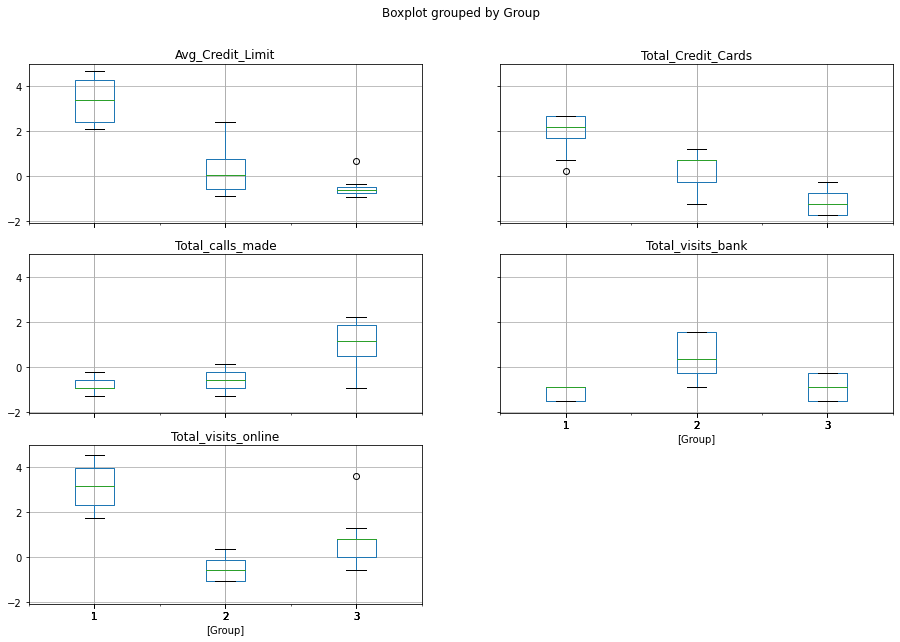

In [359]:
# Clustering and visualizing using boxplots
cluster = fcluster(Z, 3.6, criterion='distance')
data3 = data_sc
data3['Group'] = cluster
data3.boxplot(by='Group', figsize=(15,10))
data3.head()
print('Number of customers per group are: ', np.bincount(cluster[cluster>=1])[1:])

#### Groups made by heirarchical clustering are also three in number and show similarity in mean and IQR as compared to those made by k-means clustering.
- **Group 3** is characterized by least avg_credit limit, least number of credit cards, less visits to the bank and less online visits. Calls made to this group are the highest. The number of customers in this group are in between: **222**.
- **Group 2** is characterized by a medium avg_credit_limit, average number of credit cards, highest visits to the bank, lowest online visits and average number of calls made. The number of customers in this group are highets: **388**.
- **Group 1** is characterized by the highest avg_credit_limit, highest number of credit cards, highest number of visits online, low visits to the bank and low number of calls made. The number of customers in this group are the least: **26**.

## 5. Silhouette scores of both clustering methods

In [360]:
# Forming the dataframe to store silhouette scores
ss_data = [['K-means Clustering', kmeans_ss],['Heirarchical Clustering', max_ss]]
ss_df = pd.DataFrame(ss_data, columns=['Clustering Methods','Silhouette score'])
ss_df

,Clustering Methods,Silhouette score
0,K-means Clustering,0.525678
1,Heirarchical Clustering,0.570333


- The silhouette scores of both clustering methods are stored in the dataframe. A silhouette score is better when closer to one. Thus Heirarchical clustering gives a better silhouette score

## 6. Final comparisons and conclusions

1. K-means and Heirarchical clustering both have their respective highest silhouette scores for 3 number of clusters. This directly showcases that the data given has a distinct boundary between the segments of customers.
2. The clusters formed represent the three distinct segment of customers present: **a.** Customers who have a high average credit limit with large number of credit cards and who are friendly towards online banking, **b.** Customers who have a medium avergae credit limit with average number of credit cards and who are least friendly towards online banking and **c.** customers who have a low average credit limit with least number of credit cards and who view online banking moderately.

#### Hence the answer to key questions are as follows:
1. There are three broad segment of customers of the bank.
2. The difference in these segments are discussed as above in point 2.
3. The segment of customers with a medium average credit limit and credit cards are the ones that need to be targeted aggressively. They are maximum in number and they are not so favorable to use online banking systems. They can be targeted by offering demos showcasing tools to use online banking and the ease of it. Online transactions can help boost consumer spending and hence could be a way to increase their average credit limit and total number of credit cards. Also, this can help cut their time and effort spent visiting the bank. The group with the lower credit limit are already targeted well. The group with the highest credit limit could be further targeted with offers suiting their spending habits.

#### Suggestion:
1. One more data column which includes **Income** of the consumers can help selectively target them further. With the known amount of disposable income, consumers with low credit limit can be aggressively targeted if their credit to income ratio is too low. This applies for all three segments.